In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt

font_path='/System/Library/Fonts/AppleGothic.ttf'
plt.rcParams['font.family'] = 'AppleGothic'  # macOS
plt.rcParams['axes.unicode_minus'] = False

SEED = 123

cancer = load_breast_cancer()


In [2]:
print(cancer.keys())
print(cancer.target_names)
print(cancer.feature_names)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
['malignant' 'benign']
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [3]:
x_train, x_test, y_train, y_test = train_test_split(cancer['data'], cancer['target'], stratify=cancer['target'], random_state=SEED)

In [4]:
x_train.shape, x_test.shape

((426, 30), (143, 30))

In [14]:
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target

print(df.describe())

print('target 분포: ', df['target'].value_counts())

       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

In [17]:
tree = DecisionTreeClassifier()

In [18]:
tree.fit(x_train, y_train)



,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [8]:
pred = tree.predict(x_test)

In [ ]:
accuracy = accuracy_score(pred, y_test)
print(f'정확도: {accuracy:.3f}')



정확도: 0.909


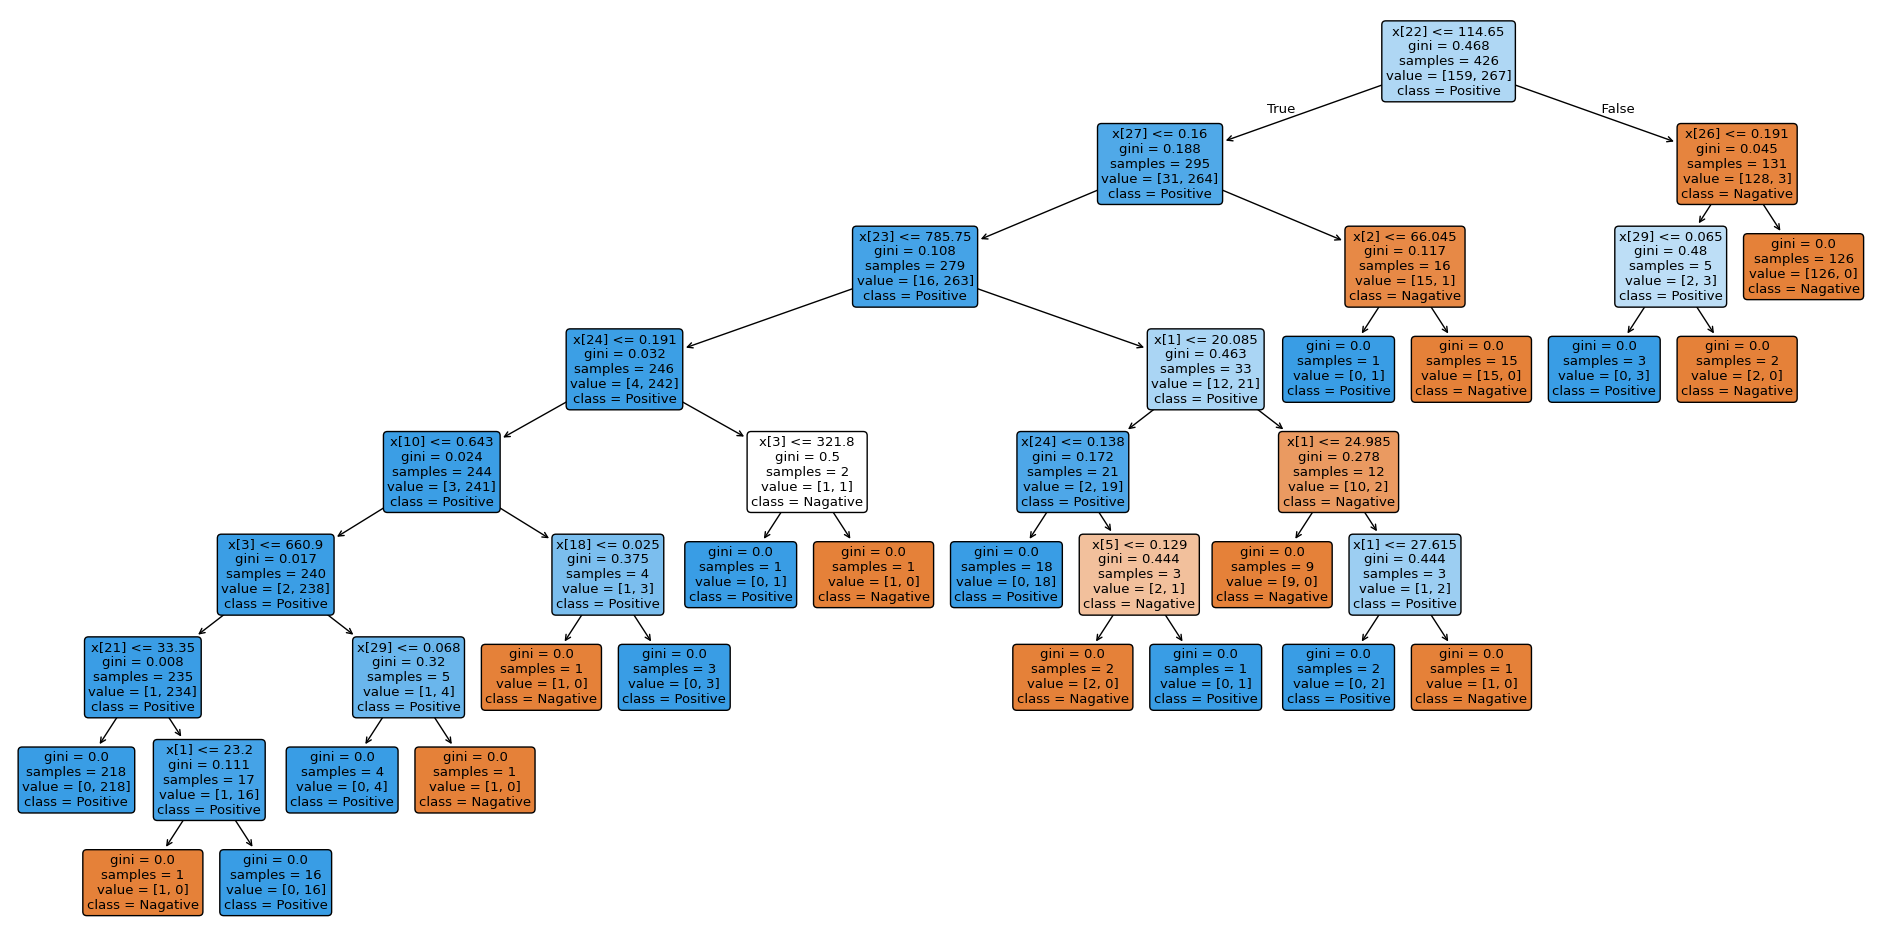

In [ ]:
# from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
# from sklearn.model_selection import train_test_split
# from sklearn.datasets import make_classification

def show_trees1(tree):
    plt.figure(figsize=(24, 12))
    plot_tree(tree, filled=True, rounded=True, class_names=['Nagative', 'Positive'])
    plt.show()


show_trees1(tree)

시각화

In [29]:
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score
from subprocess import call
import graphviz

def show_trees(tree):
    export_graphviz(tree,
                    out_file='tree.dot',
                    class_names=["악성", "양성"],
                    feature_names=cancer['feature_names'],
                    precision=3,
                    node_ids=True,
                    filled=True)
    # 이미지 생성 코드 추가
    # call(['dot', '-Tpng', 'tree.dot', '-o', 'decision-tree.png', '-Gdpi=300'])

    with open("tree.dot") as f:
        dot_graph = f.read()
    pred = tree.predict(x_test)
    print('정확도: {:.2f} %'.format(accuracy_score(y_test, pred) * 100))
    display(graphviz.Source(dot_graph), )

정확도: 93.01 %


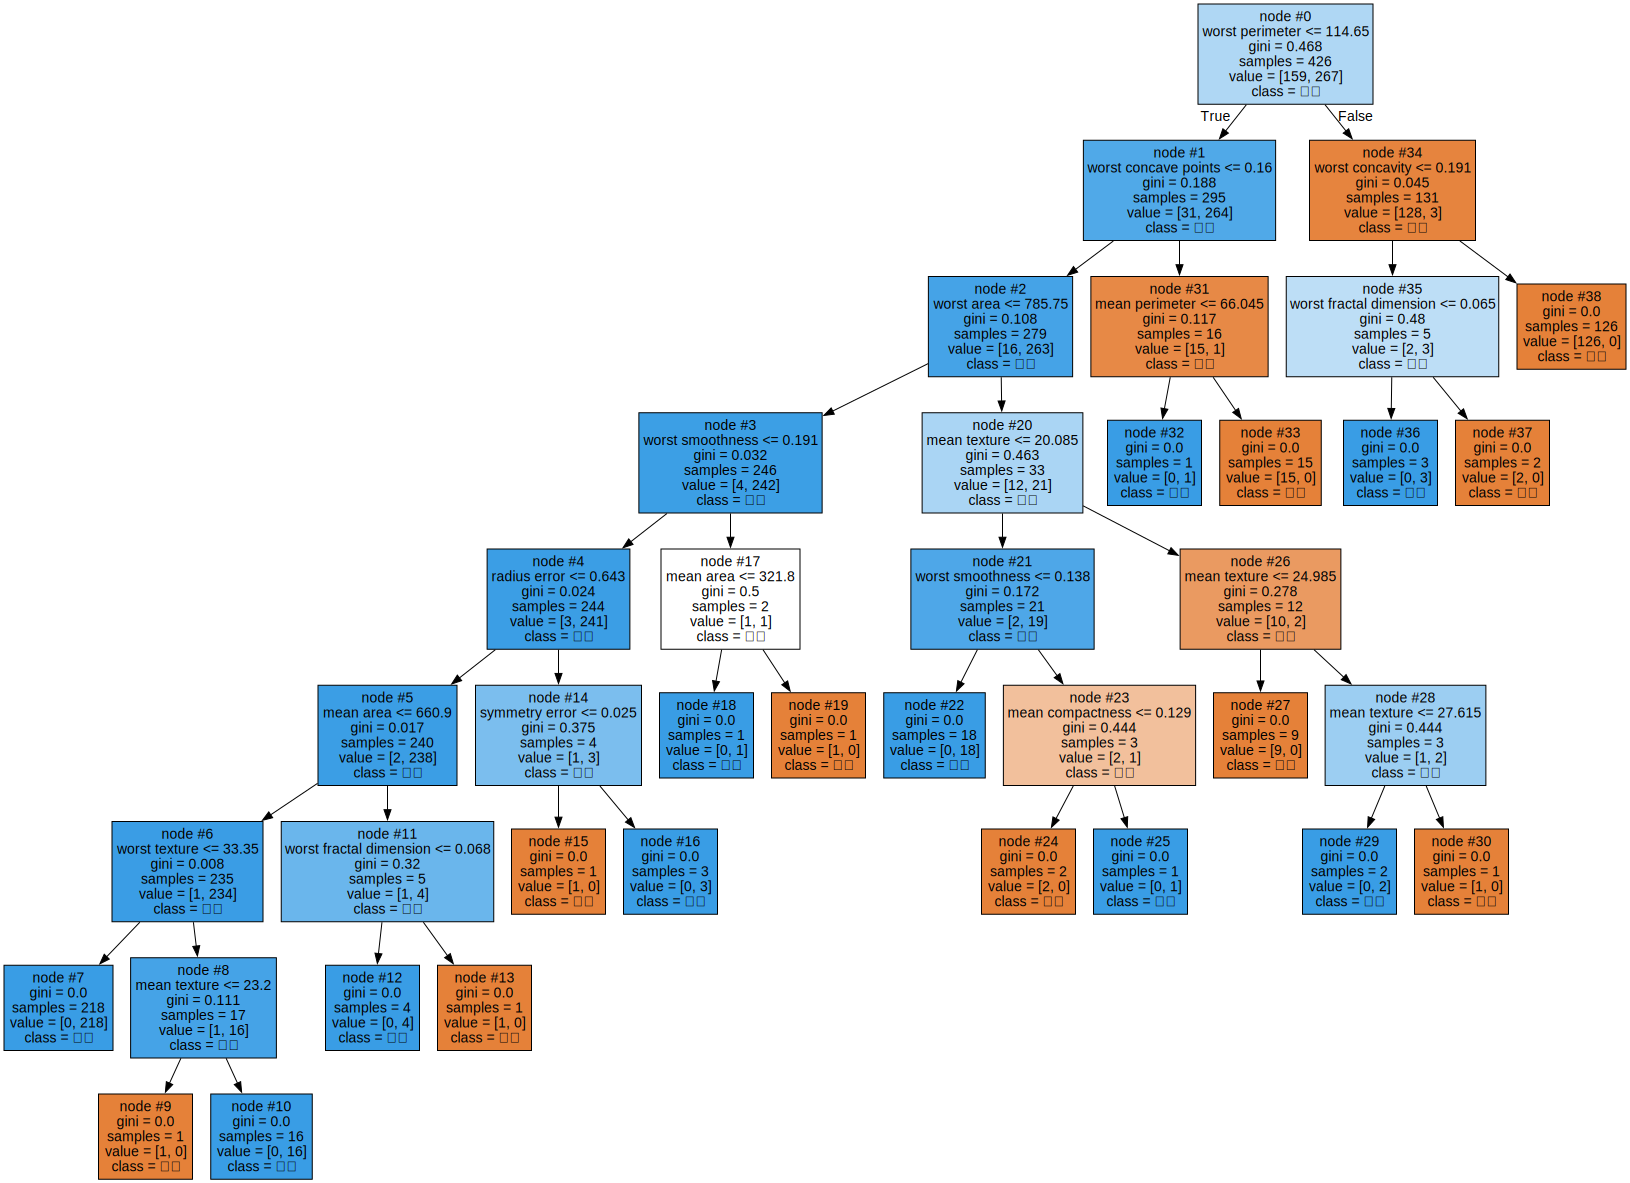

In [31]:
show_trees(tree)